In [79]:
import pandas as pd
import numpy as np

In [80]:
df = pd.read_csv('course_lead_scoring.csv')

In [211]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,No Value,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,No Value,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [82]:
df['industry'].mode()

0    retail
Name: industry, dtype: object

In [83]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [84]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [85]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
categorical

['lead_source', 'industry', 'employment_status', 'location']

In [86]:
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score', 'converted']

In [87]:
df[numerical]

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
0,1,79450.0,4,0.94,1
1,1,46992.0,1,0.80,0
2,5,78796.0,3,0.69,1
3,2,83843.0,1,0.87,0
4,3,85012.0,3,0.62,1
...,...,...,...,...,...
1457,1,NaN,4,0.53,1
1458,3,65259.0,2,0.24,1
1459,1,45688.0,3,0.02,1
1460,5,71016.0,0,0.25,1


In [88]:
for c in categorical:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [89]:
df.head().T

,0,1,2,3,4
lead_source,paid_ads,social_media,events,paid_ads,referral
industry,NaN,retail,healthcare,retail,education
number_of_courses_viewed,1,1,5,2,3
annual_income,79450.0,46992.0,78796.0,83843.0,85012.0
employment_status,unemployed,employed,unemployed,NaN,self_employed
location,south_america,south_america,australia,australia,europe
interaction_count,4,1,3,1,3
lead_score,0.94,0.8,0.69,0.87,0.62
converted,1,0,1,0,1


In [90]:
df[numerical]=df[numerical].fillna(0)

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [93]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [97]:
df[categorical]=df[categorical].fillna('No Value')

In [99]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [100]:
df_test.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
719,organic_search,technology,1,0.0,employed,middle_east,2,0.90,0
683,paid_ads,finance,1,47129.0,No Value,south_america,1,0.93,0
503,No Value,education,0,0.0,unemployed,asia,5,0.97,1
424,events,retail,0,64775.0,self_employed,south_america,3,0.70,1
846,social_media,finance,3,46934.0,No Value,australia,3,0.26,1


In [101]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [102]:
y_train = df_train.lead_score.values
y_val = df_val.lead_score.values
y_test = df_test.lead_score.values

In [21]:
del df_train['lead_score']
del df_val['lead_score']
del df_test['lead_score']

In [103]:
df_full_train.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [104]:
df_full_train.lead_score.value_counts(normalize=True)

lead_score
0.60    0.019675
0.66    0.015398
0.20    0.015398
0.88    0.014542
0.92    0.014542
          ...   
0.58    0.005988
0.74    0.005988
0.00    0.005133
1.00    0.004277
0.80    0.003422
Name: proportion, Length: 101, dtype: float64

In [105]:
from IPython.display import display

In [106]:
global_lead_score = df['lead_score'].mean()

In [107]:
global_lead_score

0.506108071135431

In [108]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).lead_score.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_lead_score
    df_group['risk'] = df_group['mean'] / global_lead_score
    display(df_group)
    print()

lead_source


,mean,count,diff,risk
lead_source,,,,
No Value,0.503711,97,-0.002397,0.995264
events,0.496458,192,-0.009650,0.980933
organic_search,0.464957,230,-0.041152,0.918690
paid_ads,0.501262,214,-0.004846,0.990424
referral,0.516165,206,0.010057,1.019871
social_media,0.515304,230,0.009196,1.018171



industry


,mean,count,diff,risk
industry,,,,
No Value,0.477434,113,-0.028674,0.943343
education,0.550510,157,0.044401,1.087731
finance,0.482194,155,-0.023915,0.952748
healthcare,0.512708,144,0.006600,1.013041
manufacturing,0.484503,151,-0.021605,0.957312
other,0.481026,156,-0.025082,0.950441
retail,0.511437,160,0.005329,1.010530
technology,0.483158,133,-0.022950,0.954654



employment_status


,mean,count,diff,risk
employment_status,,,,
No Value,0.522740,73,0.016632,1.032862
employed,0.476447,273,-0.029661,0.941394
self_employed,0.474291,275,-0.031817,0.937134
student,0.483854,288,-0.022254,0.956029
unemployed,0.558577,260,0.052469,1.103671



location


,mean,count,diff,risk
location,,,,
No Value,0.524600,50,0.018492,1.036538
africa,0.551946,149,0.045838,1.090570
asia,0.467351,151,-0.038757,0.923421
australia,0.463108,148,-0.043000,0.915038
europe,0.517045,176,0.010937,1.021611
middle_east,0.516815,157,0.010707,1.021156
north_america,0.473172,186,-0.032936,0.934923
south_america,0.496776,152,-0.009332,0.981562


In [109]:
for c in numerical:
    print(c)
    df_group = df_full_train.groupby(c).lead_score.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_lead_score
    df_group['risk'] = df_group['mean'] / global_lead_score
    display(df_group)
    print()

number_of_courses_viewed


,mean,count,diff,risk
number_of_courses_viewed,,,,
0,0.493819,144,-0.012289,0.975719
1,0.516667,330,0.010559,1.020862
2,0.495333,315,-0.010775,0.978711
3,0.488654,208,-0.017454,0.965513
4,0.462903,93,-0.043205,0.914633
5,0.485385,52,-0.020723,0.959053
6,0.576500,20,0.070392,1.139085
7,0.542500,4,0.036392,1.071905
8,0.655000,2,0.148892,1.294190



annual_income


,mean,count,diff,risk
annual_income,,,,
0.0,0.475,142,-0.031108,0.938535
13929.0,0.690,1,0.183892,1.363345
16132.0,0.470,1,-0.036108,0.928655
16351.0,0.330,1,-0.176108,0.652035
17735.0,0.350,1,-0.156108,0.691552
...,...,...,...,...
101567.0,0.360,1,-0.146108,0.711311
101908.0,0.490,1,-0.016108,0.968173
102742.0,0.050,1,-0.456108,0.098793



interaction_count


,mean,count,diff,risk
interaction_count,,,,
0,0.497213,61,-0.008895,0.982425
1,0.493512,168,-0.012596,0.975112
2,0.500313,256,-0.005796,0.988549
3,0.491439,278,-0.014669,0.971016
4,0.519495,218,0.013387,1.026452
5,0.453714,105,-0.052394,0.896477
6,0.522449,49,0.016341,1.032287
7,0.583704,27,0.077596,1.153318
8,0.505000,4,-0.001108,0.997811



lead_score


,mean,count,diff,risk
lead_score,,,,
0.00,0.00,6,-0.506108,0.000000
0.01,0.01,13,-0.496108,0.019759
0.02,0.02,16,-0.486108,0.039517
0.03,0.03,11,-0.476108,0.059276
0.04,0.04,12,-0.466108,0.079035
...,...,...,...,...
0.96,0.96,14,0.453892,1.896828
0.97,0.97,10,0.463892,1.916587
0.98,0.98,16,0.473892,1.936345



converted


,mean,count,diff,risk
converted,,,,
0,0.428084,454,-0.078024,0.845835
1,0.543902,715,0.037794,1.074676


In [110]:
combined_list = numerical + categorical
for c in combined_list:
    print(c)
    df_group = df_full_train.groupby(c).lead_score.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_lead_score
    df_group['risk'] = df_group['mean'] / global_lead_score
    display(df_group)
    print()

number_of_courses_viewed


,mean,count,diff,risk
number_of_courses_viewed,,,,
0,0.493819,144,-0.012289,0.975719
1,0.516667,330,0.010559,1.020862
2,0.495333,315,-0.010775,0.978711
3,0.488654,208,-0.017454,0.965513
4,0.462903,93,-0.043205,0.914633
5,0.485385,52,-0.020723,0.959053
6,0.576500,20,0.070392,1.139085
7,0.542500,4,0.036392,1.071905
8,0.655000,2,0.148892,1.294190



annual_income


,mean,count,diff,risk
annual_income,,,,
0.0,0.475,142,-0.031108,0.938535
13929.0,0.690,1,0.183892,1.363345
16132.0,0.470,1,-0.036108,0.928655
16351.0,0.330,1,-0.176108,0.652035
17735.0,0.350,1,-0.156108,0.691552
...,...,...,...,...
101567.0,0.360,1,-0.146108,0.711311
101908.0,0.490,1,-0.016108,0.968173
102742.0,0.050,1,-0.456108,0.098793



interaction_count


,mean,count,diff,risk
interaction_count,,,,
0,0.497213,61,-0.008895,0.982425
1,0.493512,168,-0.012596,0.975112
2,0.500313,256,-0.005796,0.988549
3,0.491439,278,-0.014669,0.971016
4,0.519495,218,0.013387,1.026452
5,0.453714,105,-0.052394,0.896477
6,0.522449,49,0.016341,1.032287
7,0.583704,27,0.077596,1.153318
8,0.505000,4,-0.001108,0.997811



lead_score


,mean,count,diff,risk
lead_score,,,,
0.00,0.00,6,-0.506108,0.000000
0.01,0.01,13,-0.496108,0.019759
0.02,0.02,16,-0.486108,0.039517
0.03,0.03,11,-0.476108,0.059276
0.04,0.04,12,-0.466108,0.079035
...,...,...,...,...
0.96,0.96,14,0.453892,1.896828
0.97,0.97,10,0.463892,1.916587
0.98,0.98,16,0.473892,1.936345



converted


,mean,count,diff,risk
converted,,,,
0,0.428084,454,-0.078024,0.845835
1,0.543902,715,0.037794,1.074676



lead_source


,mean,count,diff,risk
lead_source,,,,
No Value,0.503711,97,-0.002397,0.995264
events,0.496458,192,-0.009650,0.980933
organic_search,0.464957,230,-0.041152,0.918690
paid_ads,0.501262,214,-0.004846,0.990424
referral,0.516165,206,0.010057,1.019871
social_media,0.515304,230,0.009196,1.018171



industry


,mean,count,diff,risk
industry,,,,
No Value,0.477434,113,-0.028674,0.943343
education,0.550510,157,0.044401,1.087731
finance,0.482194,155,-0.023915,0.952748
healthcare,0.512708,144,0.006600,1.013041
manufacturing,0.484503,151,-0.021605,0.957312
other,0.481026,156,-0.025082,0.950441
retail,0.511437,160,0.005329,1.010530
technology,0.483158,133,-0.022950,0.954654



employment_status


,mean,count,diff,risk
employment_status,,,,
No Value,0.522740,73,0.016632,1.032862
employed,0.476447,273,-0.029661,0.941394
self_employed,0.474291,275,-0.031817,0.937134
student,0.483854,288,-0.022254,0.956029
unemployed,0.558577,260,0.052469,1.103671



location


,mean,count,diff,risk
location,,,,
No Value,0.524600,50,0.018492,1.036538
africa,0.551946,149,0.045838,1.090570
asia,0.467351,151,-0.038757,0.923421
australia,0.463108,148,-0.043000,0.915038
europe,0.517045,176,0.010937,1.021611
middle_east,0.516815,157,0.010707,1.021156
north_america,0.473172,186,-0.032936,0.934923
south_america,0.496776,152,-0.009332,0.981562


In [205]:
from sklearn.metrics import mutual_info_score, r2_score

In [111]:
def mutual_info_lead_score(series):
    return mutual_info_score(series, df_full_train.lead_score)

In [113]:
df_full_train.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [119]:
mi = df_full_train[numerical].apply(mutual_info_lead_score)
mi.sort_values(ascending=False)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: 

lead_score                  4.574968
annual_income               4.059263
interaction_count           0.345516
number_of_courses_viewed    0.289702
converted                   0.055717
dtype: float64

In [120]:
corr = df_full_train[numerical].corrwith(df_full_train.lead_score).abs()
corr.sort_values(ascending=False)

lead_score                  1.000000
converted                   0.196394
annual_income               0.031716
interaction_count           0.011290
number_of_courses_viewed    0.010711
dtype: float64

In [121]:
corr = df_full_train[numerical].corrwith(df_full_train.interaction_count).abs()
corr.sort_values(ascending=False)

interaction_count           1.000000
converted                   0.387251
annual_income               0.068969
number_of_courses_viewed    0.026417
lead_score                  0.011290
dtype: float64

In [122]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [123]:
y_train = df_train.lead_score.values
y_val = df_val.lead_score.values
y_test = df_test.lead_score.values

In [124]:
global_lead_score = df['lead_score'].mean()

In [125]:
from sklearn.metrics import mutual_info_score

In [126]:
def mutual_info_lead_score(series):
    return mutual_info_score(series, df_train.lead_score)

In [127]:
mi = df_train[categorical].apply(mutual_info_lead_score)
mi.sort_values(ascending=False)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: 

industry             0.462332
location             0.459879
lead_source          0.317113
employment_status    0.283865
dtype: float64

In [212]:
from sklearn.feature_extraction import DictVectorizer

In [225]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [227]:
y_train = df_train.lead_score.values
y_val = df_val.lead_score.values
y_test = df_test.lead_score.values

In [228]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [229]:
len(y_train), len(y_val), len(y_test)

(876, 293, 293)

In [230]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [219]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [220]:
z = np.linspace(-7, 7, 51)

In [221]:
sigmoid(10000)

1.0

In [223]:
import matplotlib.pyplot as plt

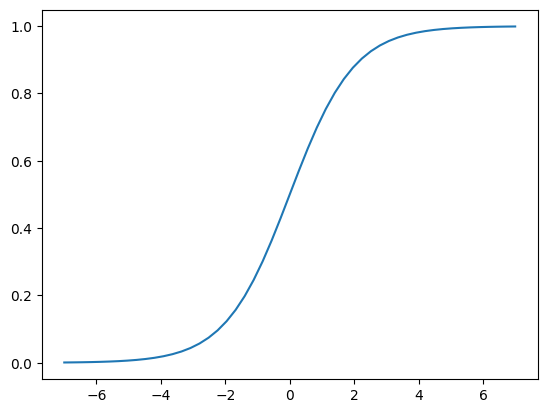

In [224]:
plt.plot(z, sigmoid(z))

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.